#### OASIS INFOBYTE INTERNSHIP

#### TASK:1 IRIS FLOWER CLASSIFICATION

#### PROBLEM STATEMENTE

Iris flower has three species; satosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to ther species, and here your task is to train a machine leaming model that can learn from the

measurements of the iris species and classify them. Although the Scot-learn library provides a dataset for is flower classification, you can also download the same datumet from here for the task of in flower classification with Machine

Learning

Import Libraries

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

Import Data

In [64]:
ata=pdd.read_csv('Iris.csv')

Shape Of Dataset

In [65]:
print("shape of dataset:",data.shape)

shape of dataset: (150, 6)


Print Data

In [66]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Generate Discriptive Statistics

In [67]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Information about all variables of the dataset

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Keys

In [69]:
data.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

How many missing values are present?

In [70]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

Plot species

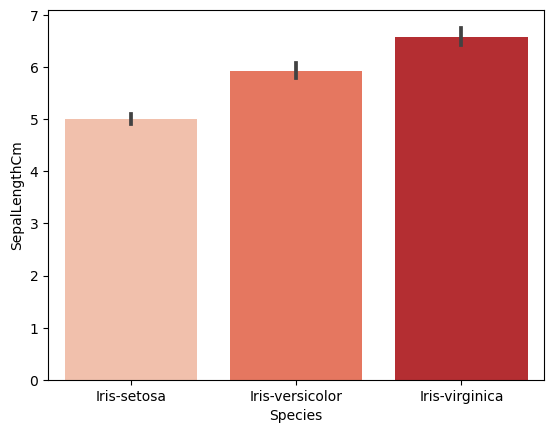

In [71]:
sns.barplot(x="Species",y="SepalLengthCm",data=data,palette="Reds")
plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

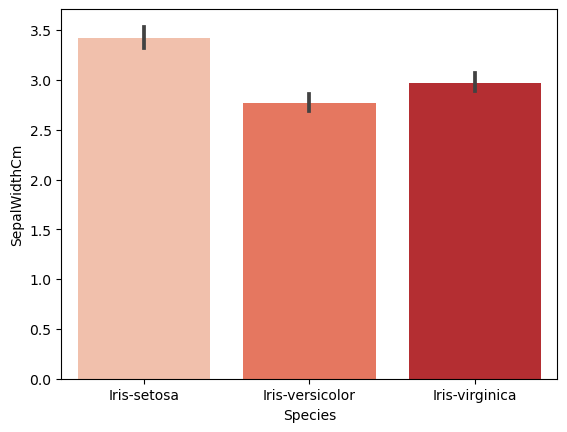

In [72]:
sns.barplot(x="Species",y="SepalWidthCm",data=data,palette="Reds")

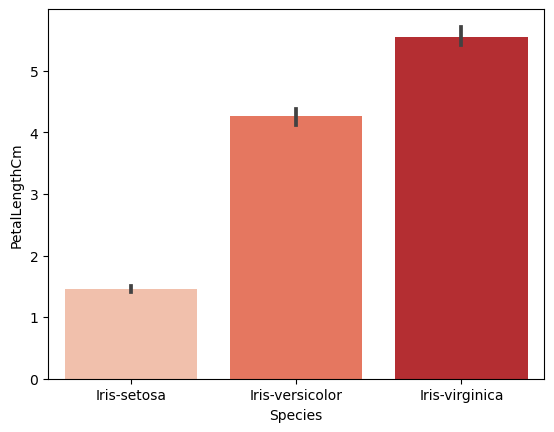

In [73]:
sns.barplot(x="Species",y="PetalLengthCm",data=data,palette="Reds")
plt.show()

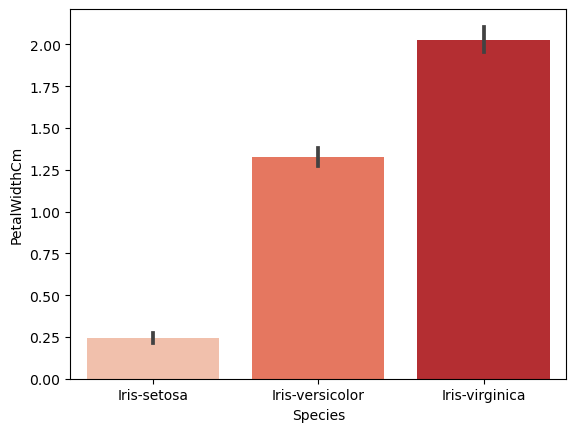

In [74]:
sns.barplot(x="Species",y="PetalWidthCm",data= data,palette="Reds")
plt.show()

split the data into train and test set

train =70% and test =30%

In [75]:
train,test = train_test_split(data,test_size=0.30)

train data

In [76]:
train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,10,4.9,3.1,1.5,0.1,Iris-setosa
116,117,6.5,3.0,5.5,1.8,Iris-virginica
26,27,5.0,3.4,1.6,0.4,Iris-setosa
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
123,124,6.3,2.7,4.9,1.8,Iris-virginica
...,...,...,...,...,...,...
34,35,4.9,3.1,1.5,0.1,Iris-setosa
111,112,6.4,2.7,5.3,1.9,Iris-virginica
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor


test data

In [77]:
test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
43,44,5.0,3.5,1.6,0.6,Iris-setosa
122,123,7.7,2.8,6.7,2.0,Iris-virginica
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
21,22,5.1,3.7,1.5,0.4,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
126,127,6.2,2.8,4.8,1.8,Iris-virginica
2,3,4.7,3.2,1.3,0.2,Iris-setosa
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
135,136,7.7,3.0,6.1,2.3,Iris-virginica


In [78]:
train.count()

Id               105
SepalLengthCm    105
SepalWidthCm     105
PetalLengthCm    105
PetalWidthCm     105
Species          105
dtype: int64

In [79]:
test.count()

Id               45
SepalLengthCm    45
SepalWidthCm     45
PetalLengthCm    45
PetalWidthCm     45
Species          45
dtype: int64

split the features and targets

In [80]:
train_x=train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y=train.Species

test_x=train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y=train.Species

features of train data

In [81]:
train_x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
9,4.9,3.1,1.5,0.1
116,6.5,3.0,5.5,1.8
26,5.0,3.4,1.6,0.4
68,6.2,2.2,4.5,1.5
123,6.3,2.7,4.9,1.8
...,...,...,...,...
34,4.9,3.1,1.5,0.1
111,6.4,2.7,5.3,1.9
77,6.7,3.0,5.0,1.7
51,6.4,3.2,4.5,1.5


In [82]:
train_y

9          Iris-setosa
116     Iris-virginica
26         Iris-setosa
68     Iris-versicolor
123     Iris-virginica
            ...       
34         Iris-setosa
111     Iris-virginica
77     Iris-versicolor
51     Iris-versicolor
100     Iris-virginica
Name: Species, Length: 105, dtype: object

In [83]:
test_x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
9,4.9,3.1,1.5,0.1
116,6.5,3.0,5.5,1.8
26,5.0,3.4,1.6,0.4
68,6.2,2.2,4.5,1.5
123,6.3,2.7,4.9,1.8
...,...,...,...,...
34,4.9,3.1,1.5,0.1
111,6.4,2.7,5.3,1.9
77,6.7,3.0,5.0,1.7
51,6.4,3.2,4.5,1.5


In [84]:
test_y

9          Iris-setosa
116     Iris-virginica
26         Iris-setosa
68     Iris-versicolor
123     Iris-virginica
            ...       
34         Iris-setosa
111     Iris-virginica
77     Iris-versicolor
51     Iris-versicolor
100     Iris-virginica
Name: Species, Length: 105, dtype: object

Train model using vector method

In [85]:
model=svm.SVC()
model.fit(train_x,train_y)

SVC()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

Predict data

In [86]:
predict = model.predict(test_x)

Compare train and test

In [87]:
metrics.accuracy_score(predict,test_y)

0.9714285714285714

Test the model

In [88]:
test=np.array([[4,3,2,5]])
iris_name=model.predict(test)
print(iris_name)

['Iris-virginica']


C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
